# Exercise 5 – Female Demographics in Singapore

Notebook Written By: WDY (Yale-NUS '24) (Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

The Urban Redevelopment Authority divides Singapore into 231 subzones for purposes of statistics and urban planning.

The objective of this activity is to determine whether we can apply the normal model to the proportion of women in the subzones.

We will be working with a dataset of Singapore's demographics. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [12]:
sg_pop <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 8 - Analyzing Student Surveys/sg_pop.csv")

## Step 1: Append a column fem_prop that contains the proportion of residents that are female.

In [13]:
sg_pop$fem_prop <- sg_pop$female / (sg_pop$female + sg_pop$male)

## Step 2: Calculate the mean y¯ and standard deviation s of fem_prop.

In [14]:
y_bar <- mean(sg_pop$fem_prop)
y_bar

s <- sd(sg_pop$fem_prop)
s

[1] 0.5118451

[1] 0.02826376

## Step 3: Plot a histogram of fem_prop. Does the distribution pass the criteria for modelling as a normal distribution?

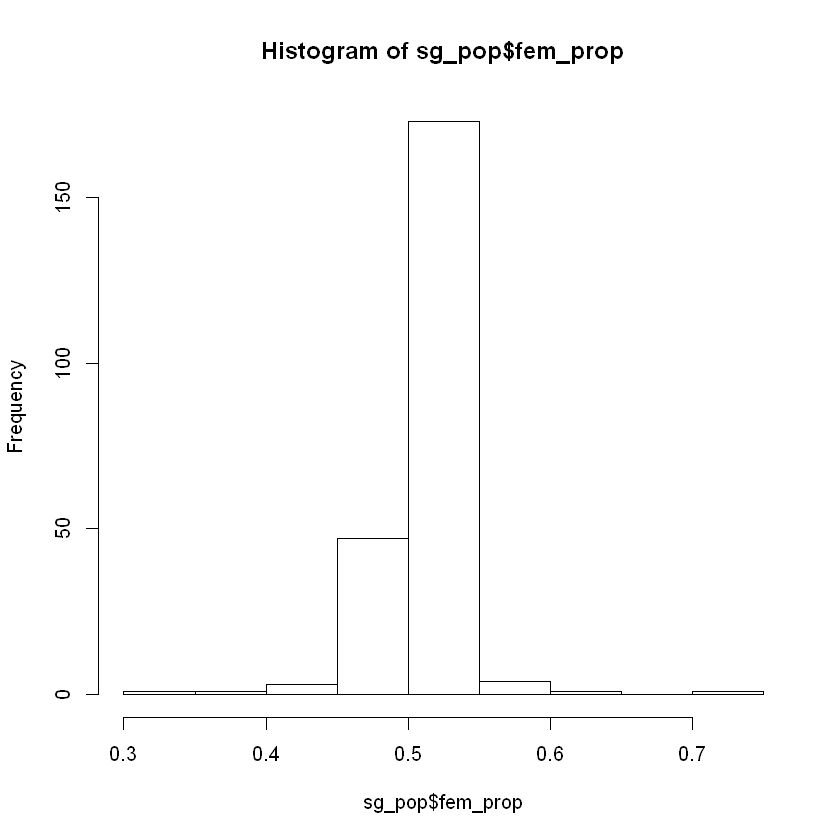

In [15]:
hist(sg_pop$fem_prop)

## Step 4: Use R to answer the following questions.

What percentage of subzones has a proportion of women <0.45:
- according to the normal model,
- according to the data?

What are the predicted and observed percentages of subzones with a female proportion >0.55.

In [16]:
# What percentage of a normal distribution N(y_bar, s) is below 0.45?

# pnorm(x, mean, sd)

pnorm(0.45, mean = y_bar, sd = s) * 100

[1] 1.432965

In [17]:
# What percentage of the subzones are below 0.45?

sum(sg_pop$fem_prop < 0.45) / nrow(sg_pop) * 100

[1] 2.164502

In [18]:
# What percentage of a normal distribution N(y_bar, s) is above 0.55?

# 1 - probability because 0.55 is from 0 to 0.55 while we are finding 1 to 0.55

(1 - pnorm(0.55, mean = y_bar, sd = s)) * 100

[1] 8.851473

In [19]:
# What percentage of the subzones are above 0.55?

sum(sg_pop$fem_prop > 0.55) / nrow(sg_pop) * 100

[1] 2.597403

## Step 5: Make a histogram of fem_prop and overlay a normal distribution with the same mean and standard deviation. Vary the bin width to explore the data.

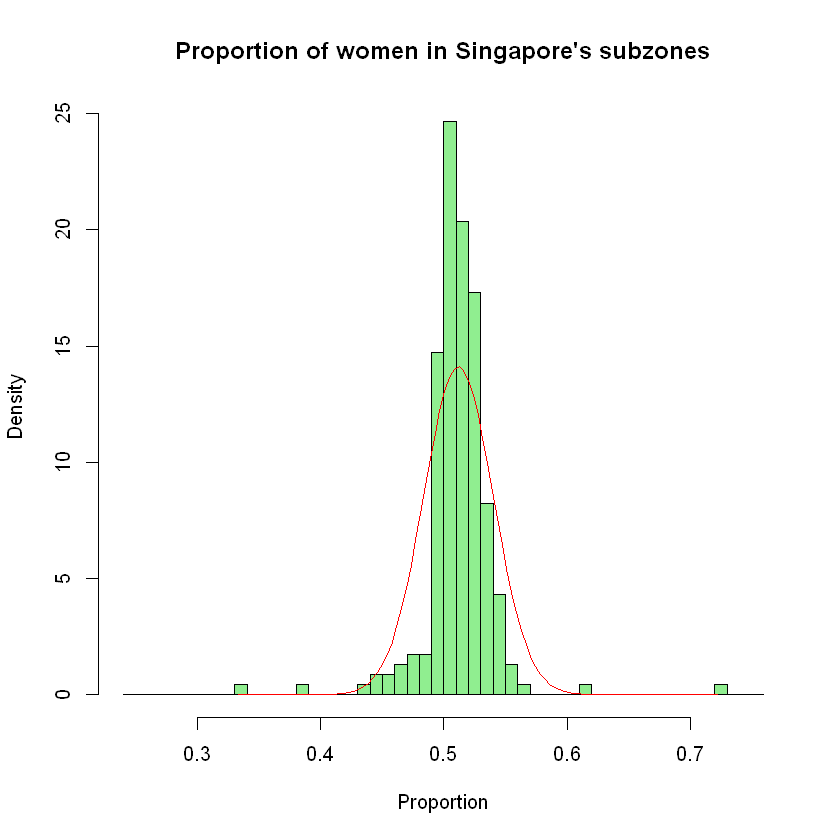

In [21]:
hist(sg_pop$fem_prop,
     breaks = seq(0.24, 0.76, 0.01),
     freq = FALSE,
     col = "lightgreen",
     main = "Proportion of women in Singapore's subzones",
     xlab = "Proportion")

# dnorm refers to the height of the point to the x axis, so you can draw a curve like that

# dnorm(x, mean, sd)

# curve(x, from = , to = , add = TRUE)
# In this case, add is to add another existing plot on the current plot

curve(dnorm(x, mean = y_bar, sd = s),
      from = min(sg_pop$fem_prop),
      to = max(sg_pop$fem_prop),
      add = TRUE,
      col = "red")

## Step 6: Make a “Normal Probability Plot”.

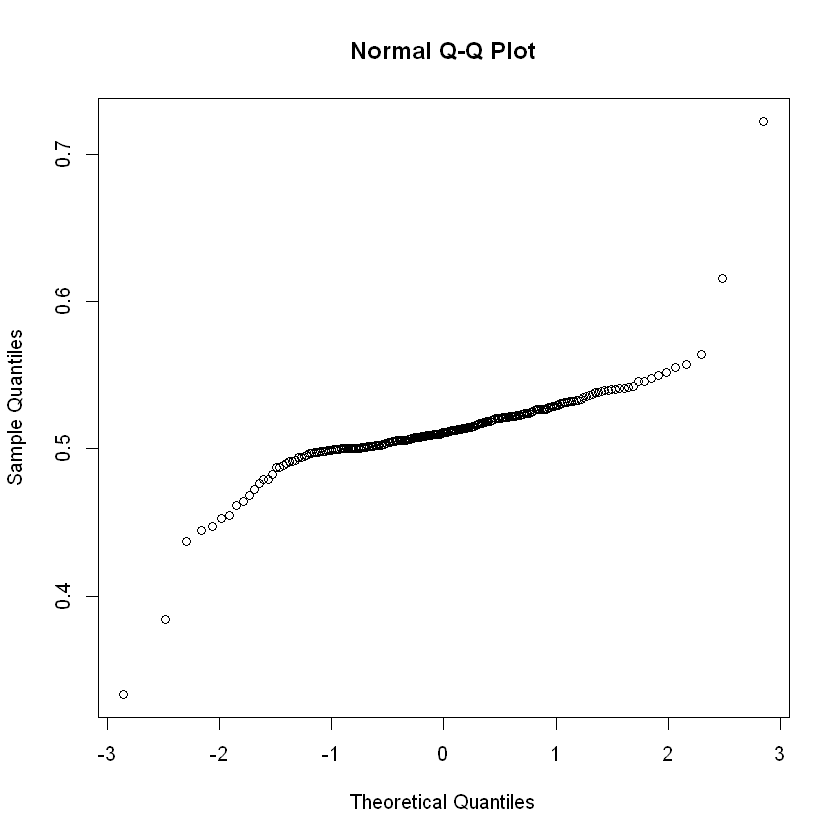

In [22]:
# In this case, qq norm is basically a quantitle-quantile plot

qqnorm(sg_pop$fem_prop)

## Step 7: Remove Outliers

Which subzones have a female proportion below 0.4? Which subzones have a female proportion above 0.6?

,subzone,female,male,fem_prop
42,Clarke Quay,50,80,0.3846154
88,Kampong Glam,60,120,0.3333333


,subzone,female,male,fem_prop
65,Gali Batu,80,50,0.6153846
129,National University of S'pore,260,100,0.7222222


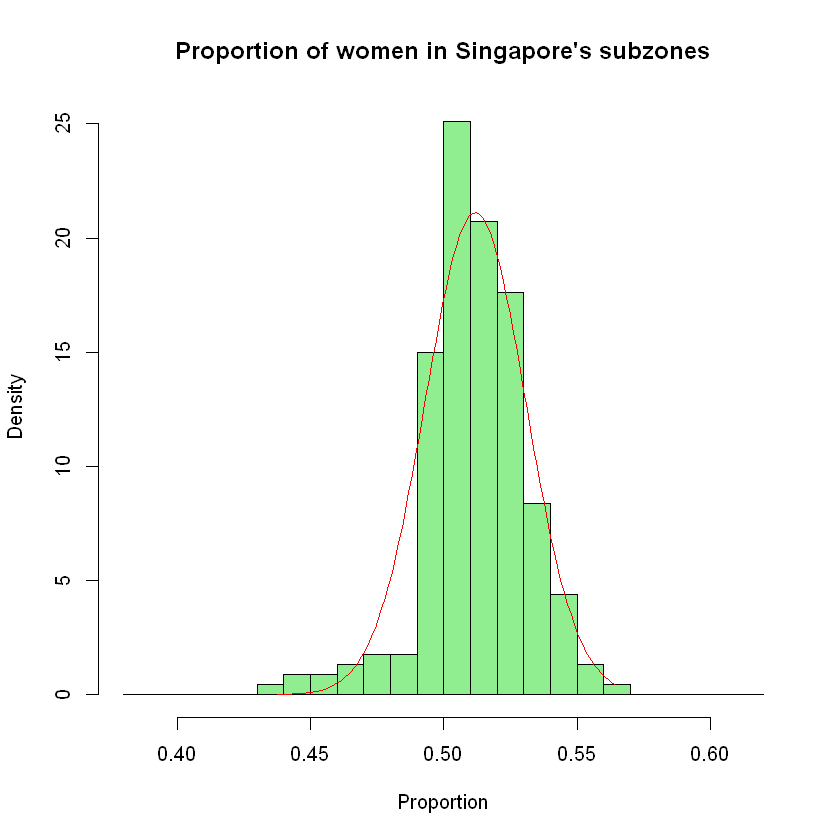

In [25]:
# Information about the extremes of the distribution.
sg_pop[sg_pop$fem_prop < 0.4, ]

sg_pop[sg_pop$fem_prop > 0.6, ]

# Remove outliers.
sg_trim <- sg_pop[sg_pop$fem_prop >= 0.4 & sg_pop$fem_prop <= 0.6, ]

# We must compute the mean and standard deviation of the trimmed
# distribution.
y_bar_trim <- mean(sg_trim$fem_prop)
s_trim <- sd(sg_trim$fem_prop)

# Replot the graphs

hist(sg_trim$fem_prop,
    breaks = seq(0.38, 0.62, 0.01),
    freq = FALSE,
    col = "lightgreen", 
    main = "Proportion of women in Singapore's subzones",
    xlab = "Proportion")

curve(dnorm(x, mean = y_bar_trim, sd = s_trim),
     from = min(sg_trim$fem_prop),
     to = max(sg_trim$fem_prop),
     add = TRUE,
     col = "red")

## Step 8: Remove these subzones from the data. Does the normal model fit the remaining data better?

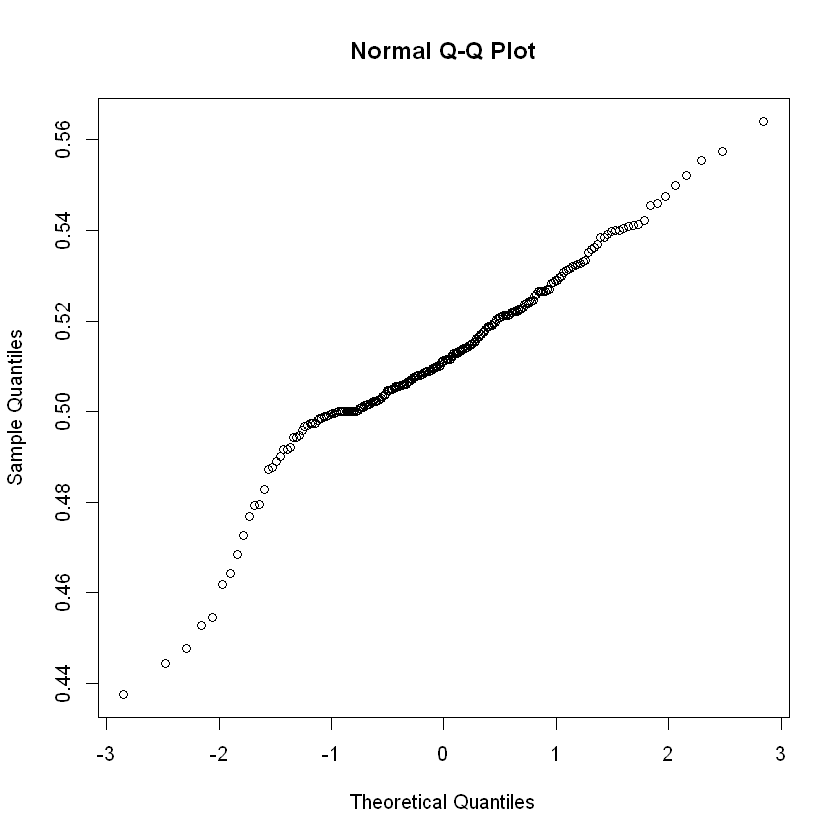

In [26]:
qqnorm(sg_trim$fem_prop)

## Step 9: Check if outliers were reasonable to remove.

Add a column total to the data frame and investigate with a histogram and the order() function. Does this justify removing the outliers?

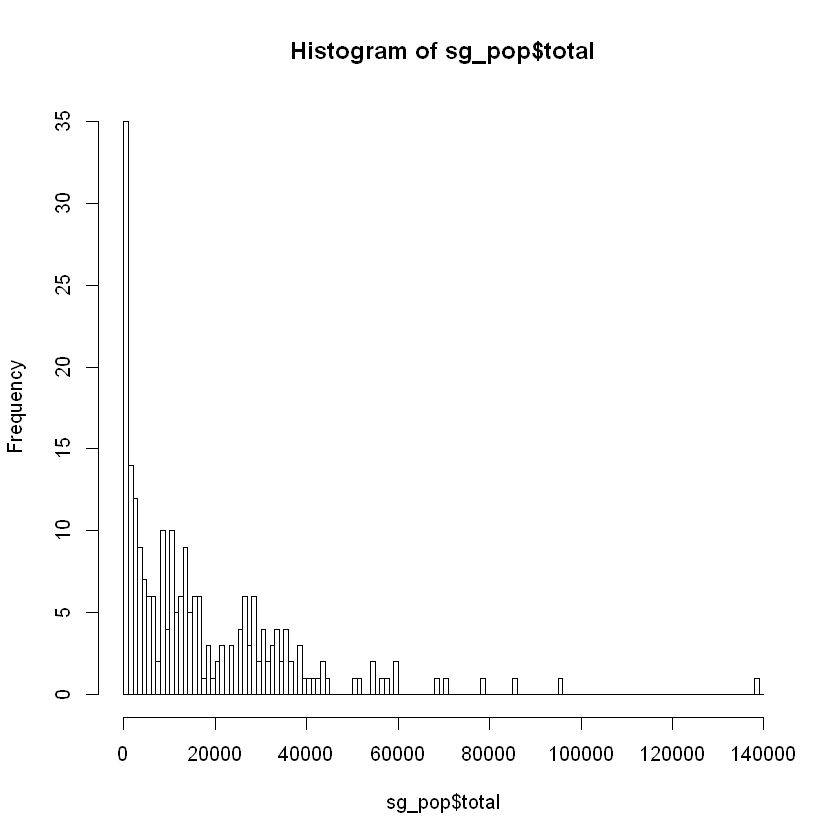

In [27]:
sg_pop$total <- sg_pop$female + sg_pop$male
hist(sg_pop$total, breaks = seq(0, 140000, 1000))

In [28]:
head(sg_pop[order(sg_pop$total),],20)

,subzone,female,male,fem_prop,total
112,Mackenzie,50,60,0.4545455,110
42,Clarke Quay,50,80,0.3846154,130
65,Gali Batu,80,50,0.6153846,130
180,Somerset,70,60,0.5384615,130
151,Port,70,70,0.5000000,140
146,Paterson,80,70,0.5333333,150
31,Cecil,70,90,0.4375000,160
63,Fort Canning,80,80,0.5000000,160
179,Singapore Polytechnic,80,80,0.5000000,160
17,Boat Quay,80,100,0.4444444,180


These 4 are not even the lowest, though all in lowest 20. This is poor justification for removing the outliers (for removing just the outliers).

## Conclusion: 

National University of Singapore is not a place people tend to live permanently. Perhaps each of the outliers is a special zone with unusual land use.

Use https://www.citypopulation.de/en/singapore/admin/ to investigate the land use in each of these regions. It looks like these data are from the mid 2015 estimate. Does this justify removing the outliers?

- Gali batu is a train depot, disused quarry, small industrial estate, and wild land. No one lives there.
- NUS is a student zone. No one lives there permanently.
- Clarke Quay is tourist & nightlife location, not residential.
 -Kampong Glam is also tourist not residential.

That seems like good reason for removing these subzones. But there are other regions that should also be removed by the same reasoning:

- One North is an industrial estate
- Fort Canning is a park
- Western Water Catchment is a nature reserve, university (NTU), cemeteries, aquaculture, reservoirs and military base
- Port is a port!

When removing outliers,

- justify the removal on the basis of the data, not on trying to get a good fit to a preferred model,
- consider that it might be appropriate to remove other data points for the same reasons as the outliers,
- you may need to seek more contextual information beyond your dataset to make informed decision on data points to discard.


## THANK YOU FOR VIEWING THIS NOTEBOOK :-)